In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from sklearn.cluster import KMeans

### Find location of centre of optic disc

(1000, 1300)


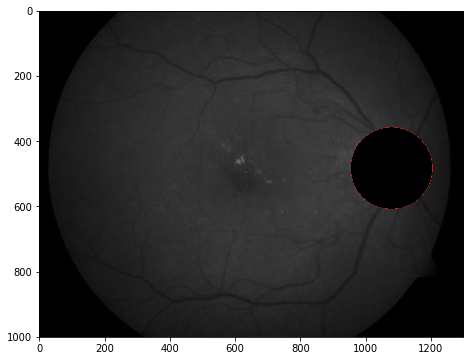

1078 483


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import data, color
from skimage.io import imread, imshow
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
import cv2

# Load picture and detect edges
im = imread('ODmasked-image-274.png')
image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print(image.shape)
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(100, 200, 5)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 5 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 6))
imagea = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    imagea[circy, circx] = (220, 20, 20)

ax.imshow(imagea, cmap=plt.cm.gray)
plt.show()
print(center_x, center_y)

C:\Users\Alex\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Alex\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


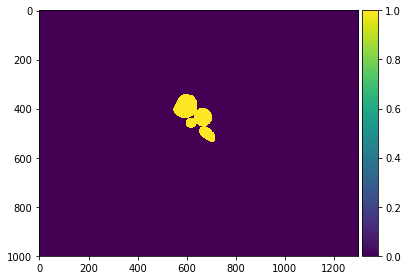

In [48]:
import matplotlib.pyplot as plt
imGT = imread('resized-image-274.png')
imGTGrey = cv2.cvtColor(imGT, cv2.COLOR_BGR2GRAY)
#imshow(imGTGrey)

# topGroup = 
#print(len(imGTGrey[imGTGrey >= 100]))
imGTGrey[imGTGrey < 225 ] = 0
imGTGrey[imGTGrey >= 225] = 1
imshow(imGTGrey)



In [50]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
import csv
position = 0 #left

img_ent = entropy(image, disk(5))


if center_x >= 650:
    position = 1 #right

pixelDicts = []
distances = np.zeros(image.shape[0:2])
for x in range(distances.shape[0]):
    for y in range(distances.shape[1]):
        distance = np.sqrt((x-center_x)**2+(y-center_y)**2)
        pixelDict = {'x':x,'y':y, #coordinates, not used in classification, just for matching up with ground truths
                     'r':im[x,y][0],'g':im[x,y][1],'b':im[x,y][2], #rgb values
                     "Left/Right (0/1)": position,
                     'Distance From Disc':distance, 'Entropy':img_ent[x,y],
                     'Exudate Pixel': imGTGrey[x,y] }
        pixelDicts.append(pixelDict)
keys = pixelDicts[0].keys()
with open('image274.csv', 'w',newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(pixelDicts)